In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
spending_features = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Spending'
]





2. **Data Preparation**: We will standardize the selected features to ensure that they are on the same scale.

In [35]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv('featured_customer_segmentation.csv')

# Select relevant spending columns
X = df[spending_features]

# extract ratios for all the spending features
# Create ratio features for spending categories, excluding the Total_Spending itself
spending_categories = [feature for feature in spending_features if feature != 'Total_Spending']
for feature in spending_categories:
    X[f'{feature}_ratio'] = X[feature] / X['Total_Spending'].replace(0, 1)  # Avoid division by zero

print(X.head())

df_ratios= X[[f'{feature}_ratio' for feature in spending_categories]]


# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_ratios)

print(df_ratios.head())



   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         81              546            120.5                81   
1        11          1                6              2.0                 1   
2       426         49              127            111.0                21   
3        11          4               20             10.0                 3   
4       173         43              118             46.0                27   

   MntGoldProds  Total_Spending  MntWines_ratio  MntFruits_ratio  \
0          88.0          1551.5        0.409281         0.052208   
1           6.0            27.0        0.407407         0.037037   
2          42.0           776.0        0.548969         0.063144   
3           5.0            53.0        0.207547         0.075472   
4          15.0           422.0        0.409953         0.101896   

   MntMeatProducts_ratio  MntFishProducts_ratio  MntSweetProducts_ratio  \
0               0.351917               0.077667

/var/folders/t4/fp87jt9n1438scx07zt_2q_80000gp/T/ipykernel_60443/2935121035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'{feature}_ratio'] = X[feature] / X['Total_Spending'].replace(0, 1)  # Avoid division by zero
/var/folders/t4/fp87jt9n1438scx07zt_2q_80000gp/T/ipykernel_60443/2935121035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'{feature}_ratio'] = X[feature] / X['Total_Spending'].replace(0, 1)  # Avoid division by zero
/var/folders/t4/fp87jt9n1438scx07zt_2q_80000gp/T/ipykernel_6

3. Optimizing the **number of clusters** using the Elbow Method

[13440.000000000002, 9338.521568291335, 7260.948676197477, 6534.5953359888845, 6013.296957549021, 5308.496669362053, 4895.082396434314, 4625.696509868743, 4362.805188081022]


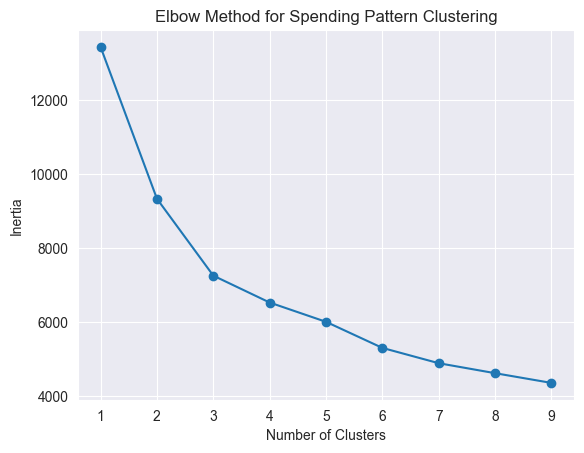

In [36]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

print(inertia)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Spending Pattern Clustering')
plt.grid(True)
plt.show()


4. **Applying KMeans Clustering** with the optimal number of clusters
We will choose 3 clusters based on the elbow method.
this is because the inertia starts to level off after 3 clusters, indicating that adding more clusters does not significantly reduce inertia.

In [37]:
# Apply KMeans clustering with clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Spending_Cluster'] = kmeans.fit_predict(X_scaled)


cluster_summary = df.groupby('Spending_Cluster')[spending_features].mean().round(2)
print(cluster_summary)


                  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Spending_Cluster                                                          
0                   434.40      14.41           104.97            20.49   
1                   296.84      31.46           248.48            48.11   
2                    30.94      15.28            29.94            21.08   

                  MntSweetProducts  MntGoldProds  Total_Spending  
Spending_Cluster                                                  
0                            14.51         39.69          628.46  
1                            32.18         44.15          701.23  
2                            14.83         28.59          140.65  


5. **Analyzing Cluster Characteristics**

We will analyze the characteristics of each cluster by computing the mean spending for each product category.

We will also visualize the average spending per product category for each cluster using a grouped bar chart.



AMOUNTS - CLUSTER MEANS:
                  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Spending_Cluster                                                          
0                   434.40      14.41           104.97            20.49   
1                   296.84      31.46           248.48            48.11   
2                    30.94      15.28            29.94            21.08   

                  MntSweetProducts  MntGoldProds  Total_Spending  
Spending_Cluster                                                  
0                            14.51         39.69          628.46  
1                            32.18         44.15          701.23  
2                            14.83         28.59          140.65  


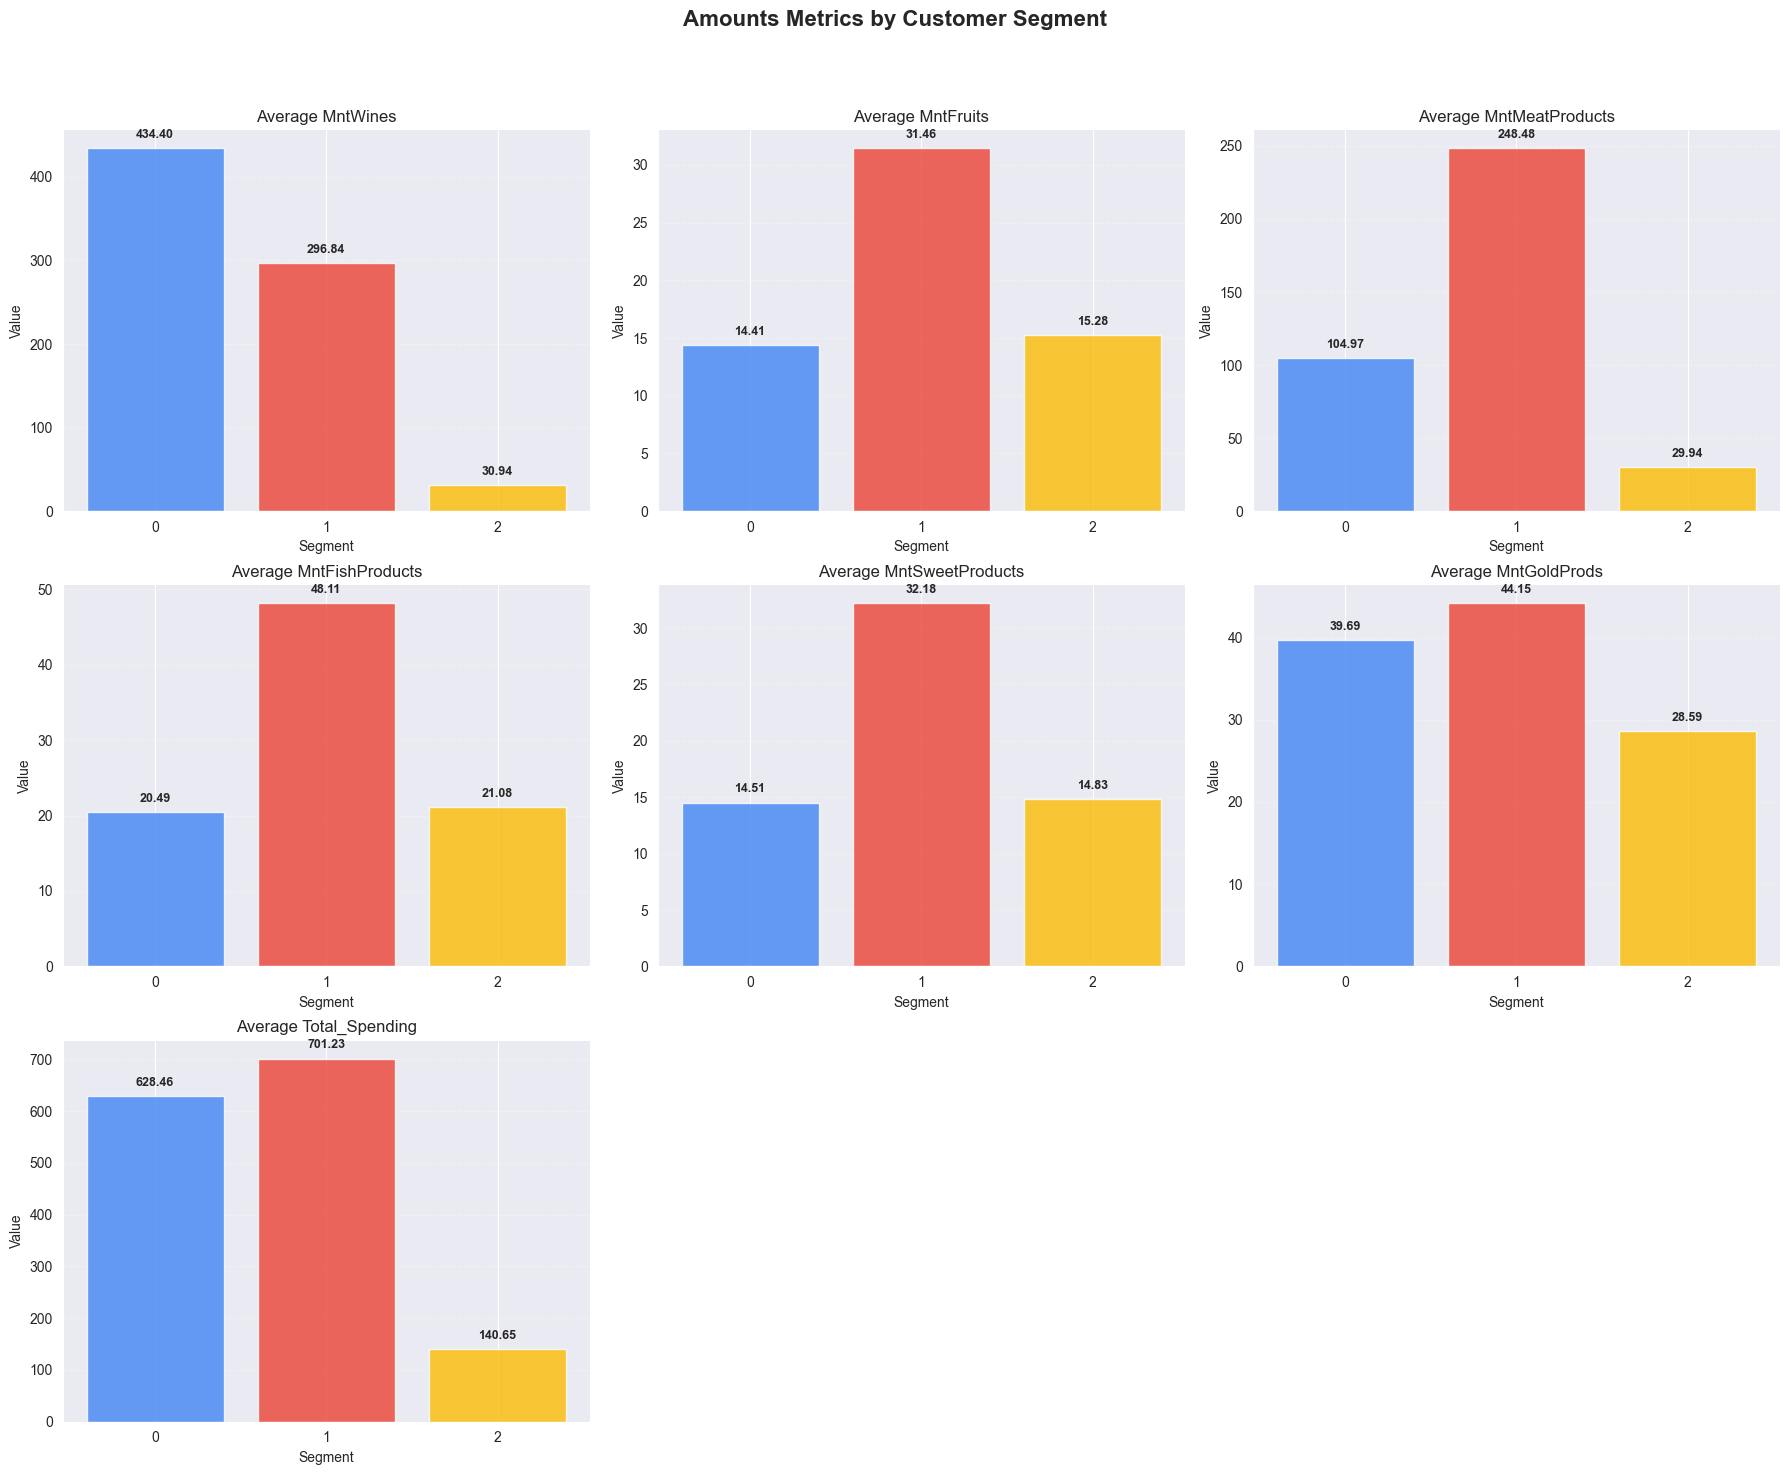


DEMOGRAPHICS - CLUSTER MEANS:
                  Education    Income    Age  Total_Purchases  \
Spending_Cluster                                                
0                      2.85  55498.94  59.24            13.72   
1                      2.43  57524.41  55.47            13.84   
2                      1.68  31388.71  51.05             6.75   

                  Total_Dependents  
Spending_Cluster                    
0                             1.17  
1                             0.78  
2                             0.88  


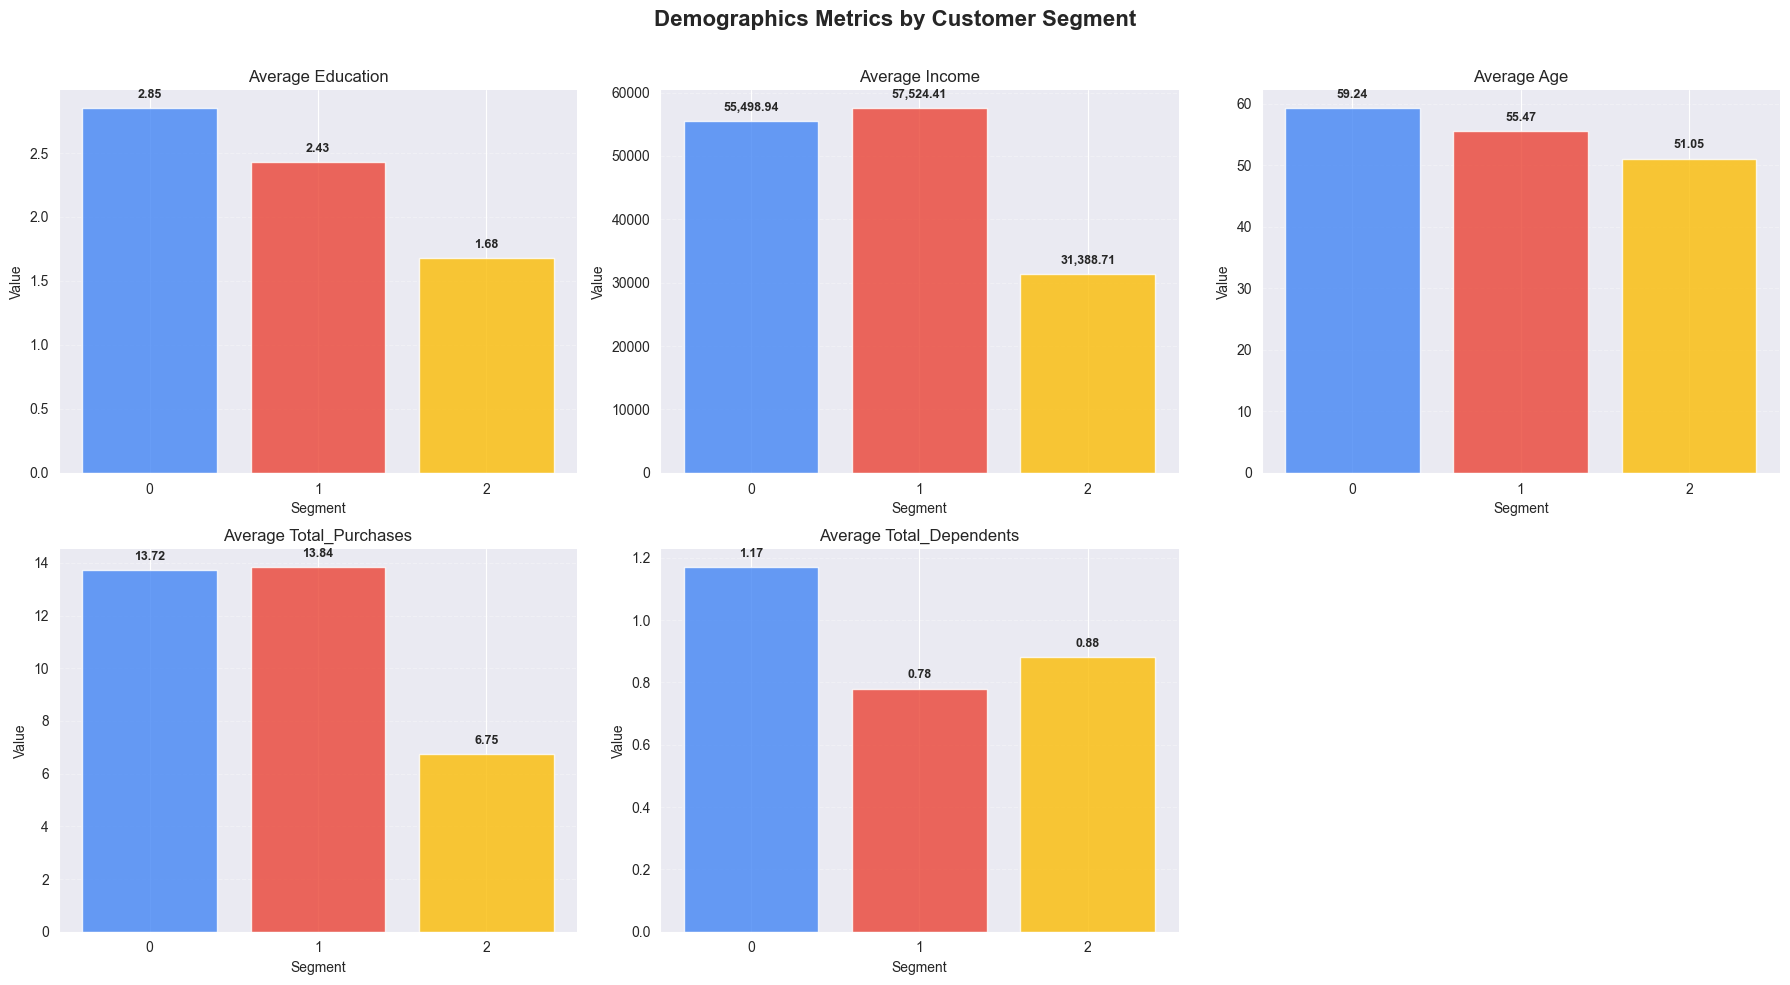

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values



SPENDING - CLUSTER MEANS:
                  Web_Ratio  Store_Ratio  Catalog_Ratio  Deals_Ratio
Spending_Cluster                                                    
0                      0.35         0.49           0.16          inf
1                      0.31         0.49           0.19         0.21
2                      0.33         0.56           0.10          inf


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


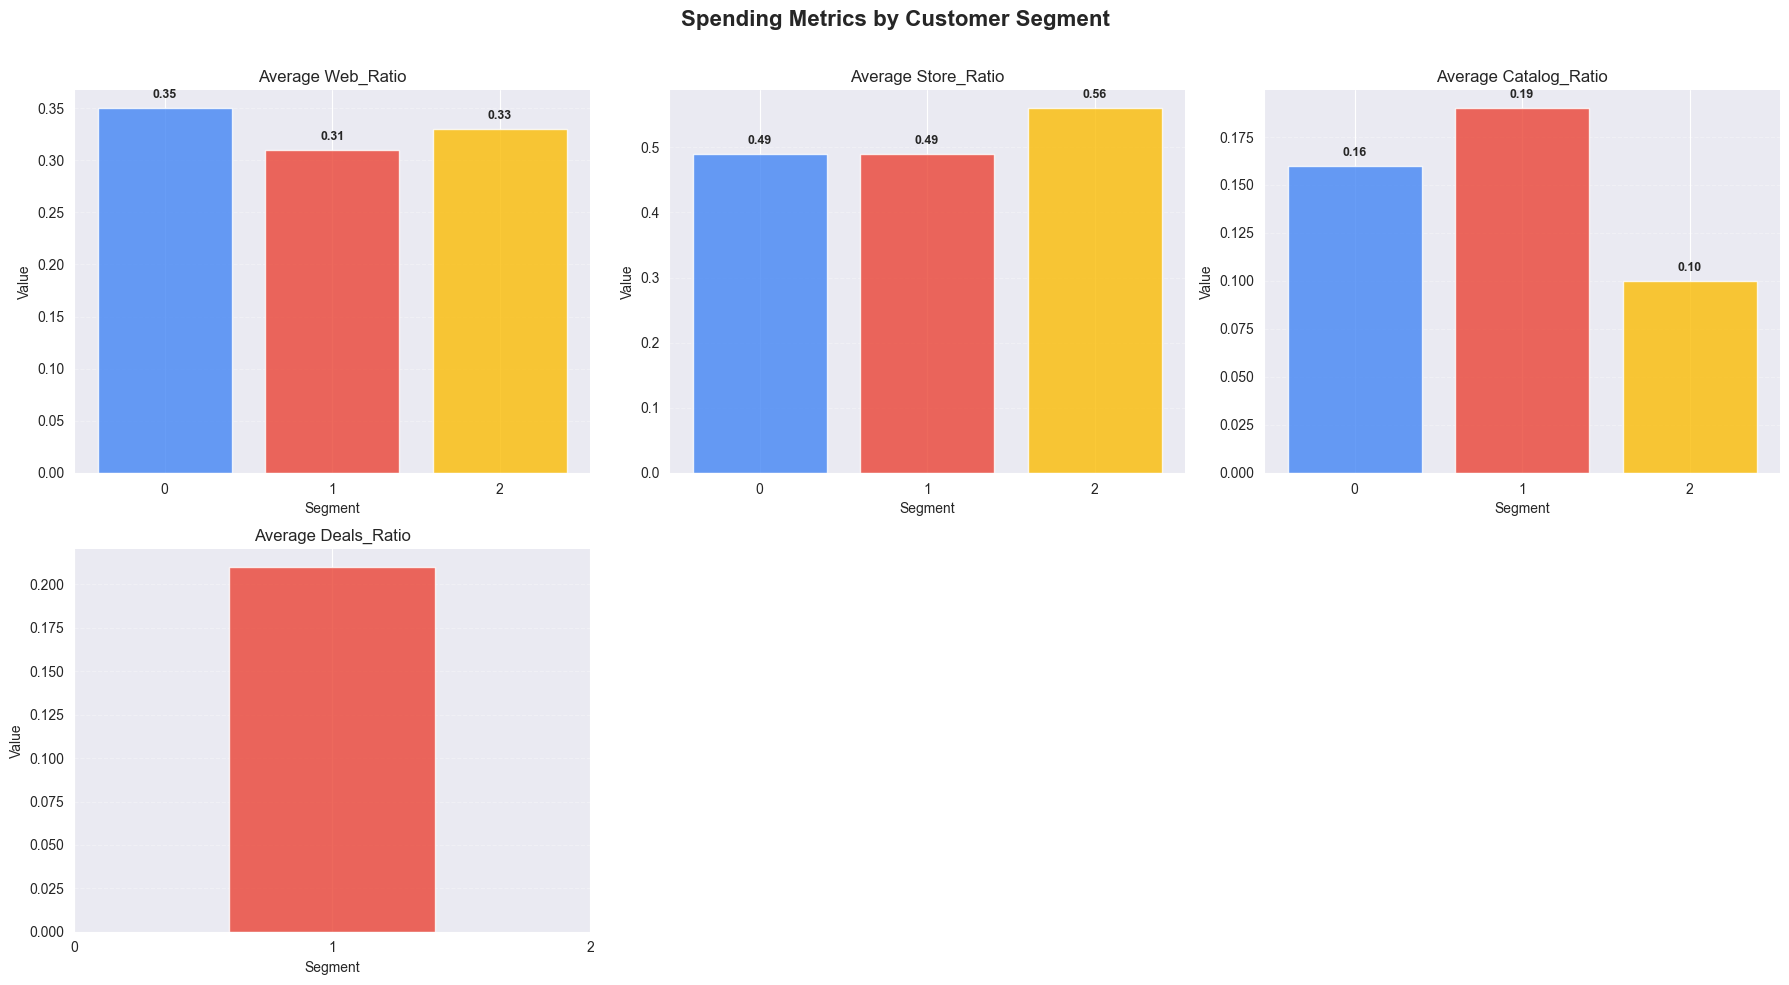

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values



CHANNEL_RATIO - CLUSTER MEANS:
                  Web_Ratio  Store_Ratio  Catalog_Ratio  Deals_Ratio
Spending_Cluster                                                    
0                      0.35         0.49           0.16          inf
1                      0.31         0.49           0.19         0.21
2                      0.33         0.56           0.10          inf


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


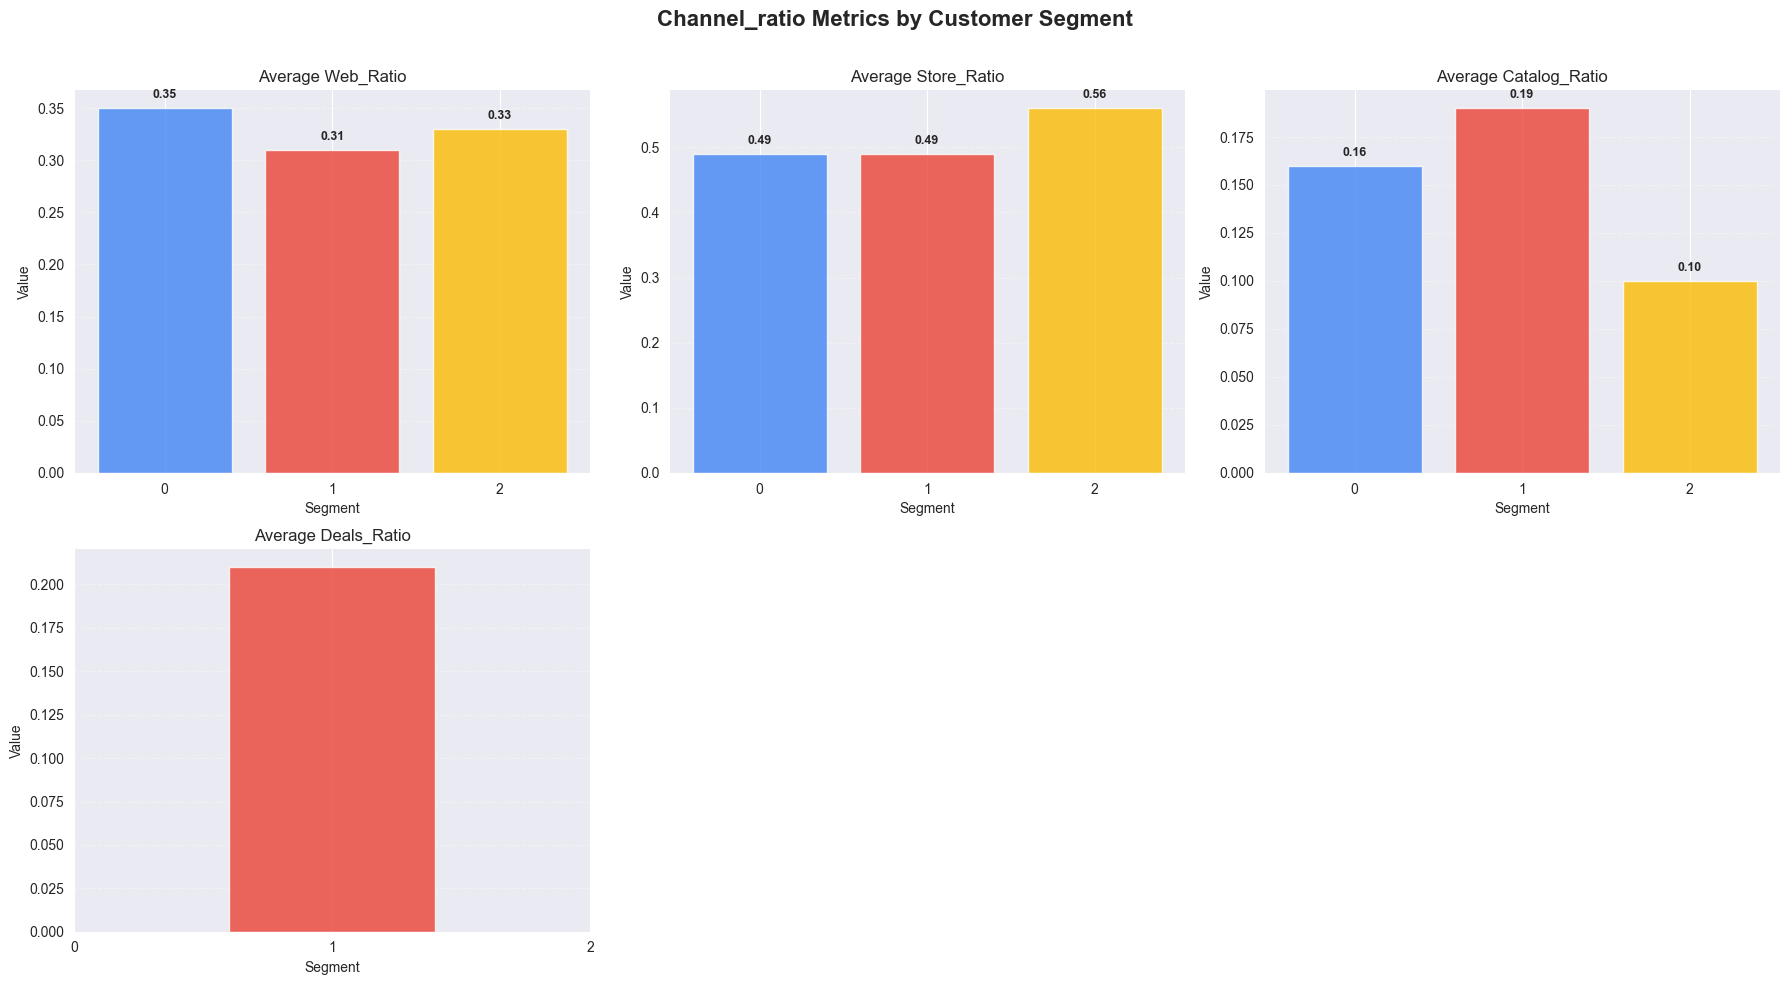


CHANNEL - CLUSTER MEANS:
                  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
Spending_Cluster                                                            
0                              2.63             4.81                 2.68   
1                              1.98             4.12                 3.36   
2                              1.86             2.33                 0.86   

                  NumStorePurchases  NumWebVisitsMonth  
Spending_Cluster                                        
0                              6.23               5.68  
1                              6.37               4.55  
2                              3.56               6.18  


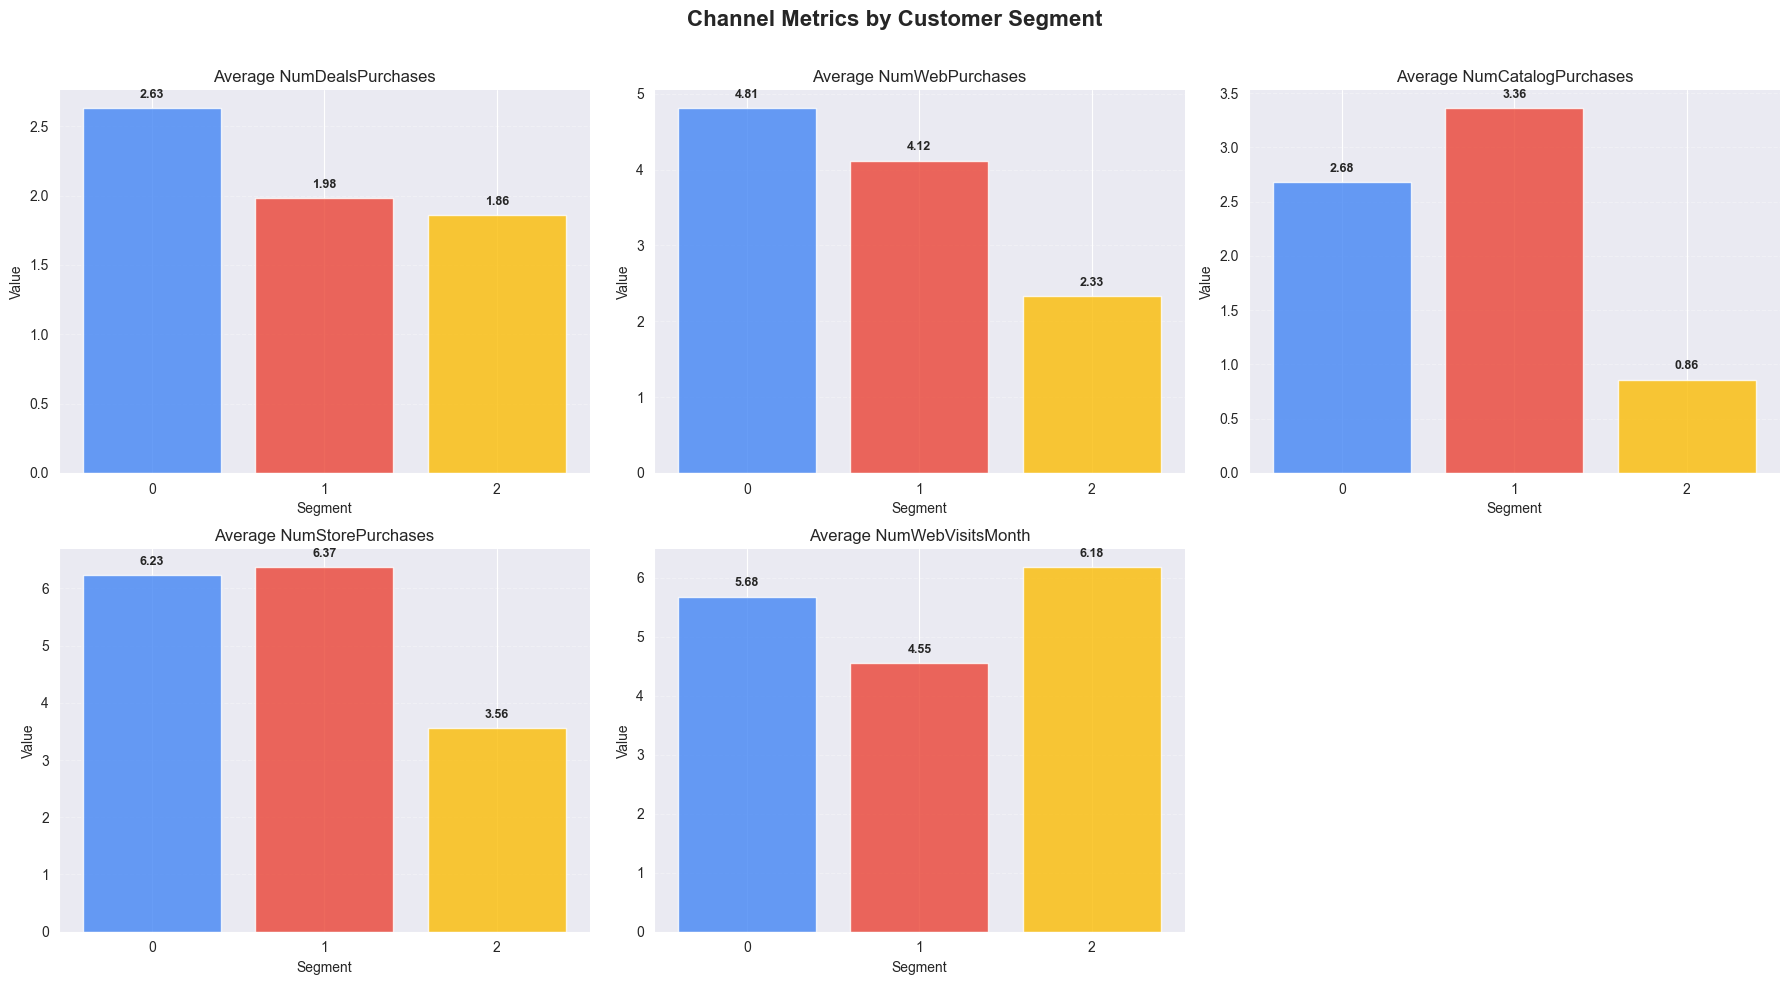

In [45]:
# Group by cluster and compute means

cluster_means = df.groupby('Spending_Cluster')[spending_features].mean()
amounts = ['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts','MntSweetProducts', 'MntGoldProds','Total_Spending']
demographics = ['Education', 'Income', 'Age', 'Total_Purchases', 'Total_Dependents']
chanel_ratio= ['Web_Ratio', 'Store_Ratio', 'Catalog_Ratio', 'Deals_Ratio']
channel=['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']



# Create dictionaries to store category dataframes
category_data = {
    'amounts': df[amounts],
    'demographics': df[demographics],
    'spending': df[spending],
    'channel_ratio': df[chanel_ratio],
    'channel': df[channel]
}

for category_name, category_cols in category_data.items():
    print(f"\n{category_name.upper()} - CLUSTER MEANS:")
    # Calculate means per cluster for this category
    means_df = df.groupby('Spending_Cluster')[category_cols.columns].mean().round(2)
    print(means_df)

    # Determine grid size based on number of columns
    n_cols = len(category_cols.columns)
    n_rows = int(np.ceil(n_cols / 3))  # 3 columns per row
    fig_width = min(18, 6 * min(n_cols, 3))
    fig_height = 5 * n_rows

    # Create subplot grid
    fig, axes = plt.subplots(n_rows, min(3, n_cols), figsize=(fig_width, fig_height))

    # Flatten axes array for easy iteration if there are multiple rows
    if n_rows > 1:
        axes = axes.flatten()
    elif n_cols == 1:  # Handle case of single plot
        axes = [axes]

    # Plot each column in the grid
    for i, column in enumerate(category_cols.columns):
        ax = axes[i] if i < len(axes) else axes[-1]
        column_data = means_df[column]

        # Create bar chart with better styling
        bars = ax.bar(
            range(len(column_data)),
            column_data,
            color=['#4285F4', '#EA4335', '#FBBC05'],
            alpha=0.8,
            edgecolor='white'
        )

        # Add data labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width()/2.,
                height + (column_data.max() * 0.02),
                f'{height:,.2f}',
                ha='center',
                va='bottom',
                fontsize=9,
                fontweight='bold'
            )

        # Styling
        ax.set_title(f'Average {column}', fontsize=12)
        ax.set_xlabel('Segment', fontsize=10)
        ax.set_ylabel(f'Value', fontsize=10)
        ax.set_xticks(range(len(column_data)))
        ax.set_xticklabels([f'{i}' for i in range(len(column_data))])
        ax.grid(axis='y', linestyle='--', alpha=0.3)

        # Remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    # Hide unused subplots if any
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    # Add an overall title for the category
    fig.suptitle(f'{category_name.capitalize()} Metrics by Customer Segment',
                fontsize=16, fontweight='bold', y=0.98)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Make space for suptitle
    plt.show()

This is a stacked bar chart showing the average spending per product category for each cluster. Each segment of the bar represents the average spending for a specific product category, and different colors represent different clusters. This visualization helps us understand how each cluster allocates its spending across various product categories.

                  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Spending_Cluster                                                          
0                    69.12       2.29            16.70             3.26   
1                    42.33       4.49            35.44             6.86   
2                    21.99      10.87            21.29            14.99   

                  MntSweetProducts  MntGoldProds  
Spending_Cluster                                  
0                             2.31          6.31  
1                             4.59          6.30  
2                            10.54         20.33  


/var/folders/t4/fp87jt9n1438scx07zt_2q_80000gp/T/ipykernel_60443/3004425831.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in current_values])


<Figure size 1200x800 with 0 Axes>

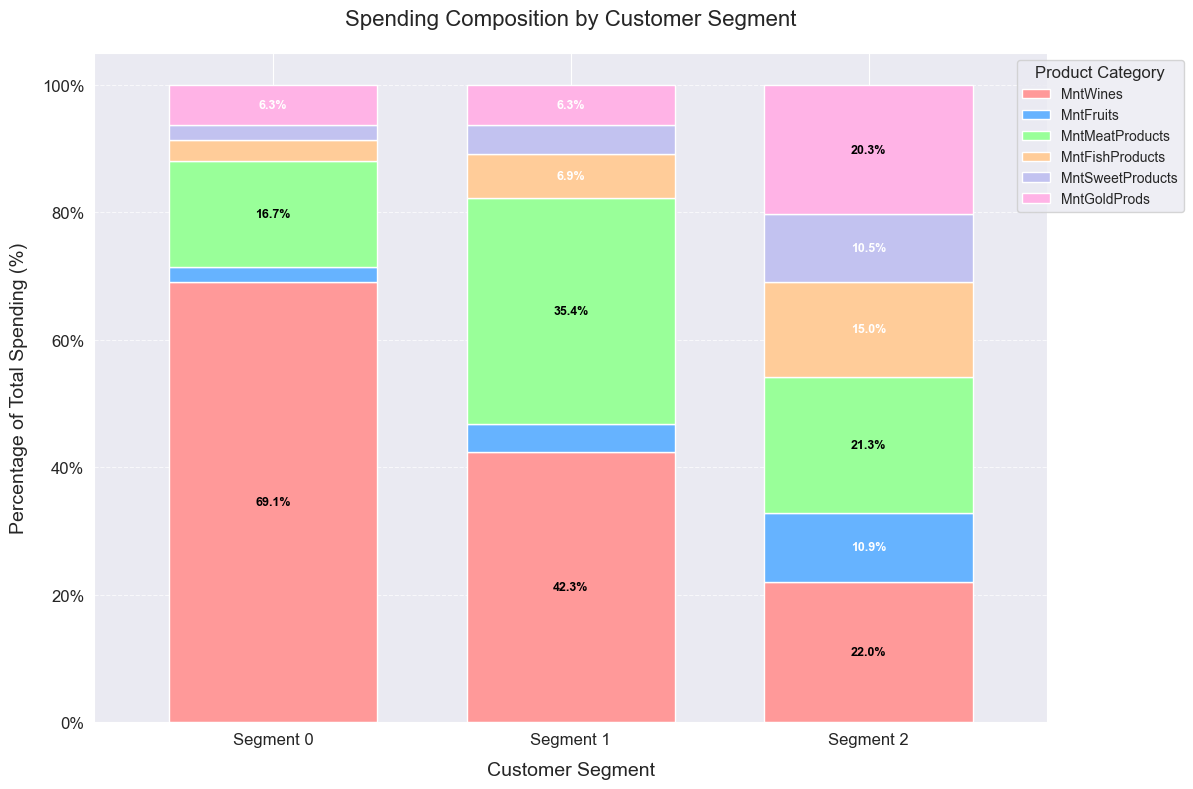

In [39]:
# Normalize category spending by total spending per cluster
normalized = df.groupby('Spending_Cluster')[
    ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
     'MntSweetProducts', 'MntGoldProds']
].mean()

# Add total spending per cluster
normalized['Total'] = normalized.sum(axis=1)

# Divide each category by total to get proportions
normalized_pct = normalized.div(normalized['Total'], axis=0).drop(columns='Total')

# Optional: Multiply by 100 for percentage
normalized_pct *= 100

print(normalized_pct.round(2))

# plot the normalized dta
# Create a colorful stacked bar chart with improved styling
plt.figure(figsize=(12, 8))

# Use a colorful palette
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
normalized_pct.plot(
    kind='bar',
    stacked=True,  # Use stacked bars to show composition
    figsize=(12, 8),
    color=colors,
    width=0.7,  # Slightly thinner bars
    edgecolor='white'  # White edge for contrast between segments
)

# Enhance styling
plt.title('Spending Composition by Customer Segment', fontsize=16, pad=20)
plt.xlabel('Customer Segment', fontsize=14, labelpad=10)
plt.ylabel('Percentage of Total Spending (%)', fontsize=14, labelpad=10)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add percentage signs to y-axis
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in current_values])

# Improve legend
plt.legend(
    title='Product Category',
    title_fontsize=12,
    fontsize=10,
    loc='upper right',
    bbox_to_anchor=(1.15, 1)
)

# Add value labels on the stacked bars
for i, cluster in enumerate(normalized_pct.index):
    cumulative = 0
    for j, col in enumerate(normalized_pct.columns):
        value = normalized_pct.loc[cluster, col]
        if value > 5:  # Only show labels for segments > 5%
            plt.text(
                i,
                cumulative + value / 2,  # Center of segment
                f"{value:.1f}%",
                ha='center',
                va='center',
                fontsize=9,
                fontweight='bold',
                color='black' if value > 15 else 'white'  # Better contrast
            )
        cumulative += value

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rename x-axis labels to more meaningful names
plt.gca().set_xticklabels([
    'Segment 0',
    'Segment 1',
    'Segment 2'
])

plt.tight_layout()
plt.show()


Average Income per Cluster:
Spending_Cluster
0    55498.94
1    57524.41
2    31388.71
Name: Income, dtype: float64


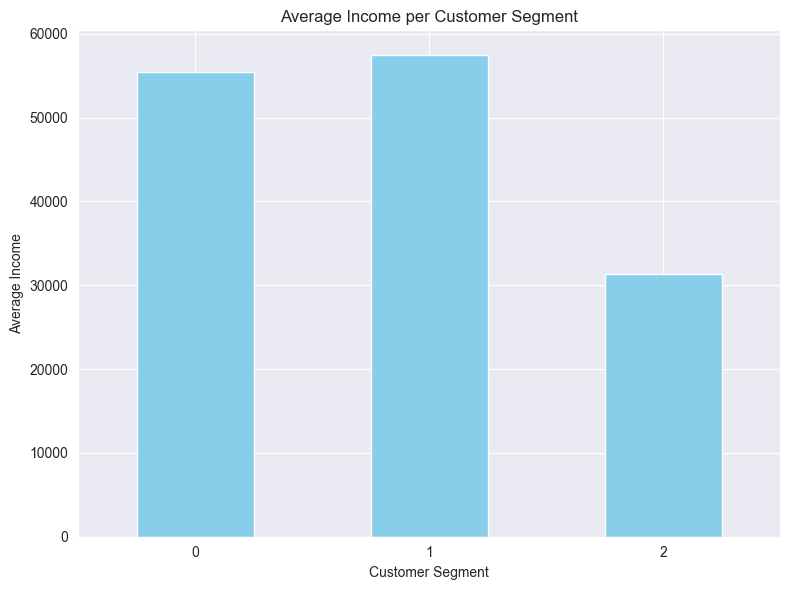

In [40]:
# average income per cluster
income_per_cluster = df.groupby('Spending_Cluster')['Income'].mean().round(2)
print("Average Income per Cluster:")
print(income_per_cluster)

# Plot average income per cluster
plt.figure(figsize=(8, 6))
income_per_cluster.plot(kind='bar', color='skyblue')
plt.title('Average Income per Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Income')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [41]:
#order of product preference per category
# Dictionary to store cluster-wise hierarchy
cluster_hierarchy = {}
cluster_means.drop('Total_Spending', axis=1, inplace=True)  # Drop Total_Spending for hierarchy
# Loop through each cluster and sort categories
for cluster_id in cluster_means.index:
    sorted_categories = cluster_means.loc[cluster_id].sort_values(ascending=False).index.tolist()
    cluster_hierarchy[cluster_id] = sorted_categories

# Display the result
for cluster, preferences in cluster_hierarchy.items():
    print(f"Cluster {cluster} preference hierarchy: {preferences}")


Cluster 0 preference hierarchy: ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntSweetProducts', 'MntFruits']
Cluster 1 preference hierarchy: ['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntSweetProducts', 'MntFruits']
Cluster 2 preference hierarchy: ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntFruits', 'MntSweetProducts']
